In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("DATASET.csv")

In [3]:
df['PhoneService'] = df['PhoneService'].fillna(0)

In [4]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No','Yes'],[0,0,1],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['InternetService'].replace(['DSL','Fiber optic','No'],[1,2,0],inplace=True)
df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
df['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
total= le.fit_transform(df['TotalCharges'])
monthly = le.fit_transform(df['MonthlyCharges'])
df['TotalCharges'] = total
df['MonthlyCharges'] = monthly
df
df.drop(columns =['customerID','gender'])


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,142,2505,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,498,1466,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,436,157,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,266,1400,0
4,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,991,1597,0
7039,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,1340,5698,0
7040,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,137,2994,0
7041,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,795,2660,1


In [7]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,683.524776,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.000000,1609.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,722.000000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


In [8]:
df_new = df[["MonthlyCharges","TotalCharges"]]
df_new.head(50)

,MonthlyCharges,TotalCharges
0,142,2505
1,498,1466
2,436,157
3,266,1400
4,729,925
5,1274,6104
6,1075,1550
7,140,2609
8,1371,2646
9,482,3022


In [9]:
df_new.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,683.524776,3257.794122
std,478.511521,1888.693496
min,0.000000,0.000000
25%,199.000000,1609.000000
50%,722.000000,3249.000000
75%,1090.000000,4901.500000
max,1584.000000,6530.000000


In [10]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_new)

In [11]:
pd.DataFrame(data_scaled).describe()

,0,1
count,7.043000e+03,7.043000e+03
mean,-5.419490e-17,1.850634e-17
std,1.000071e+00,1.000071e+00
min,-1.428541e+00,-1.725015e+00
25%,-1.012638e+00,-8.730433e-01
50%,8.041176e-02,-4.656524e-03
75%,8.495179e-01,8.703490e-01
max,1.881959e+00,1.732647e+00


k:  1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  3


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  4


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  6


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  7


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  8


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


k:  9


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


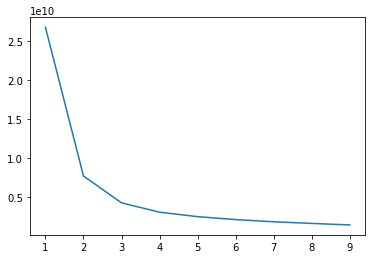

In [12]:
def elbow_plot(data, maxK=10, centroids=None):
    # """
    #     parameters:
    #     - data: pandas DataFrame (data to be fitted)
    #     - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
    #     - centroids (default = None ): float (initial value of centroids for k-means)
    # """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if centroids is not None:
            centroid = centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(centroid, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(df[['MonthlyCharges','TotalCharges']], maxK=10)

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [14]:
kmeans.inertia_

5031.362030335387

In [15]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [16]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    2901
1    2839
0    1303
Name: cluster, dtype: int64

In [17]:
centroids=kmeans.cluster_centers_

In [18]:
#plt.figure(figsize=(10,8))
#sns.scatterplot(frame['TotalCharges'],frame['MonthlyCharges'],hue=frame['cluster'],palette='bright')
#sns.scatterplot(centroids[:,0],centroids[:,1],color='black',marker='*',s=1000)
#plt.show()

In [19]:
print('Centroids of all the km cluster lables:')
frame.groupby('cluster').mean()

Centroids of all the km cluster lables:


,0,1
cluster,,
0,-0.977144,0.802759
1,0.918806,0.636889
2,-0.460280,-0.983841


In [20]:
frame.head()

,0,1,cluster
0,-1.131766,-0.398608,2
1,-0.387740,-0.948762,2
2,-0.517317,-1.641883,2
3,-0.872611,-0.983710,2
4,0.095041,-1.235224,2


In [21]:
frame.rename(columns={0:'MonthlyCharges',1:'TotalCharges'},inplace=True)

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,142,2505,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,498,1466,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,436,157,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,266,1400,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,729,925,1


In [23]:
df=pd.concat((df, frame), axis=1)

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges,TotalCharges,cluster
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,1,0,142,2505,0,-1.131766,-0.398608,2
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,1,0,1,498,1466,0,-0.387740,-0.948762,2
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,1,1,436,157,1,-0.517317,-1.641883,2
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,0,1,0,2,266,1400,0,-0.872611,-0.983710,2
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,1,0,729,925,1,0.095041,-1.235224,2


In [96]:
#df=df.drop(['MonthlyCharges'],axis=1)

In [97]:
#df.head()

In [25]:
df=df.drop(['customerID'],axis=1)

In [87]:
#scaled the data
from sklearn.model_selection import train_test_split
X=df.drop('cluster', axis=1)
y=df['cluster']
X=StandardScaler().fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [90]:
y_pred = classifier.predict(X_test)


In [91]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.9900638750887154


In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print ("Confusion Matrix : \n", cm)

In [93]:
cm

array([[248,   1,   3],
       [  3, 577,   4],
       [  0,   3, 570]])

In [54]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestClassifier

# create regressor object
Classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
Classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [55]:
Y_pred = Classifier.predict(X_test) # test the output by changing values


In [56]:
print ("Accuracy : ", accuracy_score(y_test, Y_pred))

Accuracy :  0.9879347054648687


In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
rmse=mean_squared_error(y_test, y_pred, squared=False)
print("rmse:",rmse)

rmse: 0.12776397685899066


In [58]:
rmse=mean_squared_error(y_test, Y_pred, squared=False)
print("rmse:",rmse)

rmse: 0.13584109616265394


In [64]:
from sklearn.metrics import classification_report

In [65]:
# train the model on train set
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

# print prediction results
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       252
           1       0.98      0.97      0.98       584
           2       0.96      0.98      0.97       573

    accuracy                           0.97      1409
   macro avg       0.97      0.96      0.97      1409
weighted avg       0.97      0.97      0.97      1409



In [66]:
cm = confusion_matrix(y_test, y_predict)

In [67]:
cm

array([[235,   5,  12],
       [  3, 569,  12],
       [  3,   6, 564]])

In [68]:
rmse=mean_squared_error(y_test, y_predict, squared=False)
print("rmse:",rmse)

rmse: 0.24705504626217492


In [74]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [75]:
#KNN
clf = KNeighborsClassifier()
clf.fit(X_test,y_predict)
scores = cross_val_score(clf, X_test, y_predict, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.8892815557471004


In [76]:
cm = confusion_matrix(y_test, y_pred)

In [77]:
cm

array([[248,   1,   3],
       [  3, 577,   4],
       [  0,   3, 570]])

In [78]:
rmse=mean_squared_error(y_test, y_predict, squared=False)
print("rmse:",rmse)

rmse: 0.24705504626217492


In [82]:
X[0]

array([ 1.00955867, -0.43991649,  1.03453023, -0.65401193, -1.27744458,
       -3.05401039, -0.85417615, -0.28622272, -0.63393298,  1.3782406 ,
       -0.72396752, -0.63943864, -0.79013171, -0.79607014, -0.8282069 ,
        0.8297975 , -1.14519806, -1.13176632, -0.39860759, -0.60102348,
       -1.13176632, -0.39860759])